### 4.9 Python part 2a Data Visualization part 2  Questions(1) -(4)<br>
cust_ords_prods (pkl file 'customer49.pkl')<br>
ords_prods_merge <br>

Question(2)
1. Bar_DOW (day_of_week) from Cust_ords_prods<br>
1a. line day of week
2. hist_prices from Cust_ords_prods
3. scatter_prices from Cust_ords_prods
4. line_prices from Cust_ords_prods -sample df 
Question(3)
5. hist_ohod (order_hour_of_day) from Cust_ords_prods
Question(4)
6. bar_loy (loyalty) from ords_prods_merge


In [2]:
#import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Question(1) import cust pkl file 

In [3]:
path = r'/Users/margoshogren/Desktop/1 Margo-CF Folder -desktop/4 Python/4-2023 Instacart Basket Analysis'
cust_ords_prods = pd.read_pickle(os.path.join(path,'2 Data','prepared data','customer49.pkl'))

### Question(2) create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.<br>
1. Bar_DOW (day_of_week) from Cust_ords_prods
2. hist_prices from Cust_ords_prods
3. scatter_prices from Cust_ords_prods
4. line_prices from Cust_ords_prods -sample df 

In [18]:
cust_ords_prods.head()

,user_id,First_Name,Last_Name,Gender,State,Age,date_joined,no_of_dep,Marital_status,income,...,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,9,30.0,2,0,both,Mid-range product,Busiest days,Average orders,8
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,5,15,11.0,1,1,both,Mid-range product,Regularly busy,Most orders,8
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,1,15,10.0,2,1,both,Mid-range product,Busiest days,Most orders,8
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,2,9,NaN,1,0,both,Low-range product,Regularly busy,Average orders,8
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,3,11,30.0,2,1,both,Low-range product,Least busy,Most orders,8


In [6]:
cust_ords_prods['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

#### 1. Bar chart for orders_day_of week. Bar charts are good for categorical variables

([<matplotlib.axis.XTick at 0x7f8d20fdc910>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

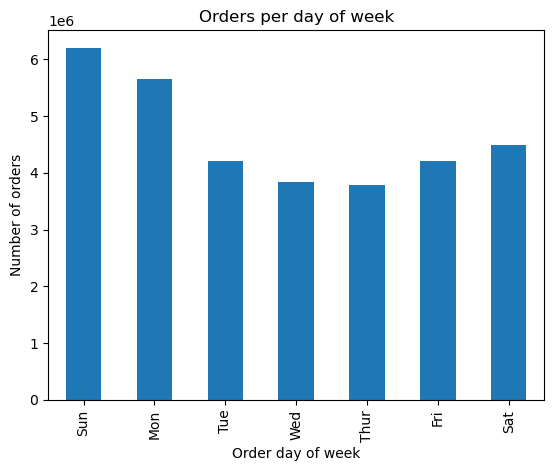

In [7]:
bar_order_DOW = cust_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.xlabel('Order day of week')
plt.ylabel('Number of orders')
plt.title('Orders per day of week')
plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'))

#### Observation: Bar chart shows Saturday(0) busiest day, followed by Sunday; least busy days are Wednesday & Thursday


### Line chart for orders by day of week

Text(0.5, 1.0, 'Orders per day of week')

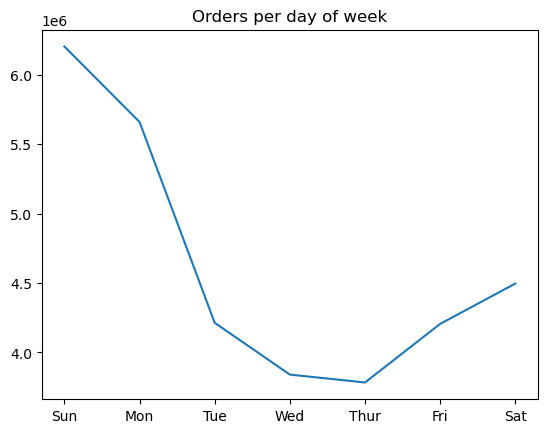

In [4]:
#reset index for result
no_odow = cust_ords_prods['orders_day_of_week'].value_counts().sort_index()

# set-up for the plot
lines = no_odow.plot.line(x = 'orders_day_of_week', y = no_odow)
plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'))

# title for line graph
plt.title('Orders per day of week')

#### Observation: Line chart shows Saturday(0) busiest day, followed by Sunday; least busy days are Tuesday & Wednesday

In [22]:
no_odow.head()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

#### 2. Create a histogram of 'prices', histograms show density for continous variables

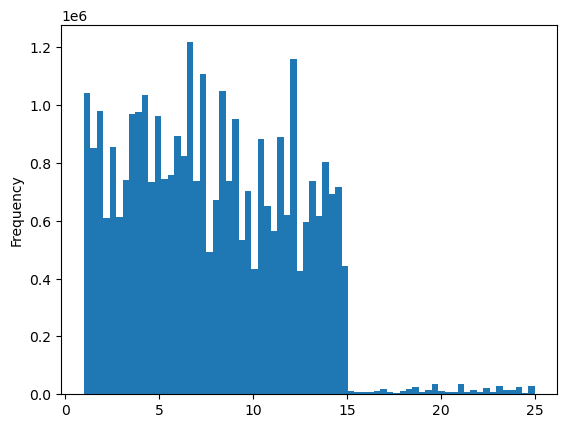

In [34]:
hist_prices = cust_ords_prods['prices'].plot.hist(bins = 70)

#### Observation: The histogram shows the frequency of prices with the most products priced between (\\$1-\\$15) , and just a small amount priced  \\$15 to \\$25.

#### 3. Scatterplot of prices is used for Exploratory Analysis and shows us outliers

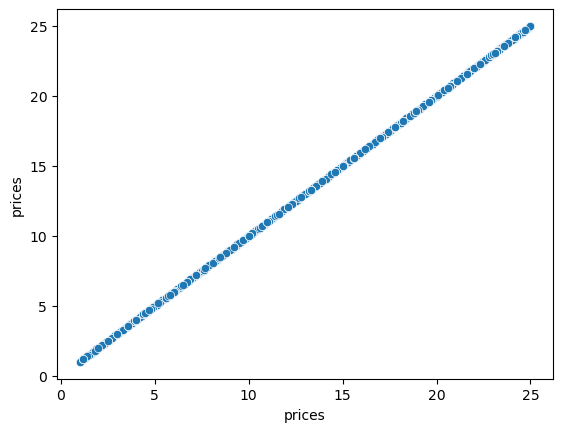

In [20]:
scatter_prices = sns.scatterplot(x='prices',y='prices', data = cust_ords_prods)

#### Observation: There are no outiers for the prices showing on the scattergram. Outliers were replaced earlier.

#### 4. Line Chart using a sample subset of data 'orders_of_day' vs. 'prices'<br>
1. Set the seed for random number generator
2. Create rows of random numbers (length of df) from 0 to 1
3. Code a test comparing each of those numbers to a value of .7
4. Store results of the test in a new list, dev as True or False

In [7]:
# Set the seed for random number generator

np.random.seed(4)

In [8]:
# Create rows of random numbers (length of df) from 0 to 1

dev = np.random.rand(len(cust_ords_prods)) <= .7

In [9]:
# Store results of the test in a new list (big for 70% of sample and small for 30%), dev as True or False

big = cust_ords_prods[dev]
small = cust_ords_prods[~dev]

In [10]:
len(cust_ords_prods)

32404859

In [11]:
len(big) + len(small)

32404859

#### Observation: big + small = entire df, which shows an account of all data.

#### reduce sample to columns necessary for the line chart in c_o_p_2 df

In [6]:
c_o_p_2 = small[['orders_day_of_week','prices']]

NameError: name 'small' is not defined

In [37]:
line_prices = sns.lineplot(data = c_o_p_2, x = 'orders_day_of_week',y = 'prices')
line_prices.set_xticklabels['Sun','Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']

NameError: name 'c_o_p_2' is not defined

#### Observation: the line chart shows most orders are made on Saturday(0) and Friday (6), the least amount of orders is on Monday.

### Question(3) Create a histogram of the “order_hour_of_day” column.<br>
5. hist_ohod ('order_hour_of_day') from cust_ords_prods

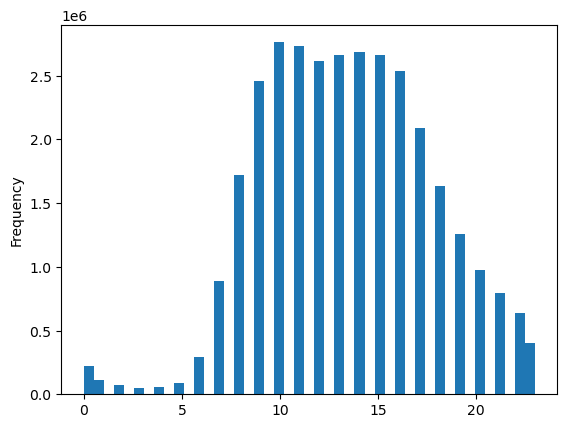

In [32]:
hist_ohod = cust_ords_prods['order_hour_of_day'].plot.hist(bins = 45)

#### Observation: The chart shows that most orders are made close to 10am thru 3pm. The least amount of orders are made between 12am and 5am.

### Question(4) Create a bar chart from the “loyalty_flag” column.<br>
6. bar_loy ('loyalty') from ords_prods_merge

In [13]:
path = r'/Users/margoshogren/Desktop/1 Margo-CF Folder/4 Python/4-2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path,'2 Data','prepared data','ords_prods_wgrps.pkl'))

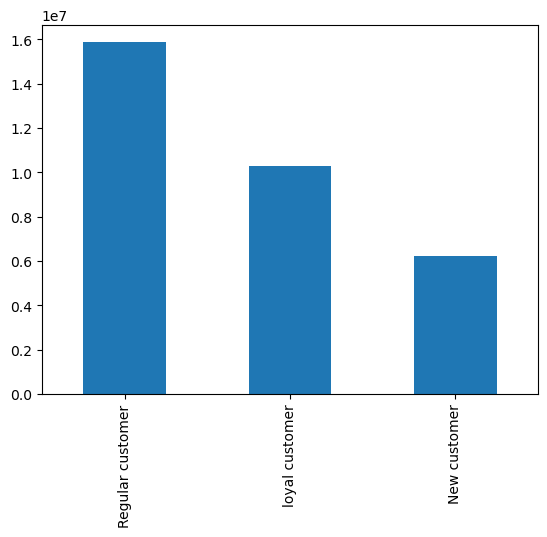

In [35]:
bar_loy = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

#### Observation: Most of the Instacart customers are in the 'regular customer' category, followed by 'loyal' and then 'new'

#### Export all visualizations <br>
    -Question(2)
1. Bar_DOW (day_of_week) from Cust_ords_prods
2. hist_prices from Cust_ords_prods
3. scatter_prices from Cust_ords_prods
4. line_prices from Cust_ords_prods -sample df <br>

    -Question(3)
5. hist_ohod (order_hour_of_day) from Cust_ords_prods<br>

    -Question(4)
6. bar_loy (loyalty) from ords_prods_merge


In [38]:
# 1. bar_order_DOW
bar_order_DOW.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Bar_order_DOW.png'))

In [5]:
#1b line odow
lines.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_odow.png'))

In [ ]:
# 2. hist_prices
hist_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices'))

In [ ]:
# 3. scatter_prices
scatter_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scatter_prices'))

In [ ]:
# 4. line_prices
line_prices.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices'))

In [ ]:
# 5. hist_ohod
hist_ohod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_ohod'))

In [16]:
# 6. bar_loy 
bar_loy.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Bar_loyalty.png'))

In [ ]:
# Export script to pickle file 'custords49_2a.pkl'
cust_ords_prods.to_pickle(os.path.join(path,'2 Data','prepared data', 'custords49_2a.pkl'))

#### to continue on 4.9 part 2a for Questions(5)-(8)